# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [2]:
#This can be described in data science terms as a regression problem where we are using supervised ML to create a predictive model that uses characteristics of a used car (i.e. features) to predict the price of the car
#i.e. the target variable. Based on the model, we will also understand which features have a strong relationship versus others and have more weight in predicting the final price of the used car.

In [198]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\liuh102\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [5]:
#After importing the dataset, there are a few ways to explore the data before modeling focusing on:
# - understanding the size (# rows) and different columns in the data set; separate the features from the target variable
# - look under the hood to see what different types/range of values there are for each column and the type of variable (i.e. continuous or categorical)
# - look for missing values/NAs and decide whether to exclude those data points or impute them; based on the size of the data gap, evaluate the quality of the dataset for data science purposes
# - plot features/target variables and/or run a PCA to look for correlation between the variables to get an idea of how one might approach modeling


In [23]:
%matplotlib inline

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import permutation_importance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
df = pd.read_csv('data/vehicles.csv')
df

id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
...            ...                     ...    ...     ...          ...   
426875  7301591192                 wyoming  23590  2019.0       nissan   
426876  7301591187                 wyoming  30590  2020.0        volvo   
426877  7301591147                 wyoming  34990  2020.0     cadillac   
426878  7301591140                 wyoming  28990  2018.0        lexus   
426879  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN       NaN          NaN     NaN       NaN   
1                            NaN       NaN          NaN     NaN       NaN   
2                            NaN       NaN          NaN     NaN       NaN   
3                            NaN       NaN          NaN     NaN       NaN   
4                            NaN       NaN          NaN     NaN       NaN   
...                          ...       ...          ...     ...       ...   
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
0               NaN          NaN                NaN   NaN  NaN        NaN   
1               NaN          NaN                NaN   NaN  NaN        NaN   
2               NaN          NaN                NaN   NaN  NaN        NaN   
3               NaN          NaN                NaN   NaN  NaN        NaN   
4               NaN          NaN                NaN   NaN  NaN        NaN   
...             ...          ...                ...   ...  ...        ...   
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
0              NaN    az  
1              NaN    ar  
2              NaN    fl  
3              NaN    ma  
4              NaN    nc  
...            ...   ...  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy  

[426880 rows x 18 columns]

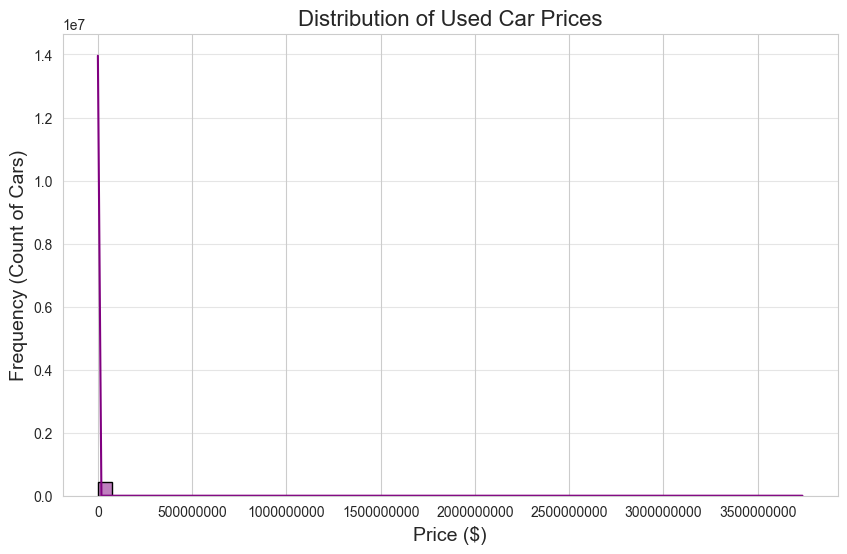

In [9]:
# Set a clean style for the plot
sns.set_style("whitegrid")

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the Histogram using your loaded DataFrame df3
# We use 50 bins and add a Kernel Density Estimate (kde=True) line
sns.histplot(df['price'], bins=50, kde=True, color='purple', edgecolor='black')

# Add Labels and Title
plt.title('Distribution of Used Car Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency (Count of Cars)', fontsize=14)

# Customize the x-axis tick labels for better readability
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='y', alpha=0.5)
plt.savefig('price_histogram.png')


In [10]:
# Use profileReport to generate a summary of the dataset
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()
profile.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:06<00:00,  2.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [11]:
## FUNCTIONS
###############################################################

###############################################################
# use model to fill in type
unique_types = df['type'].dropna().unique().tolist()

# define a function to check the 'model' and return a 'type' if found
def impute_car_type(row):
    
    #Checks if the 'type' is missing (NaN) and attempts to impute it by searching the 'model' string for any of the known unique_types.
    
    # If 'type' is already present, return it immediately
    if pd.notna(row['type']):
        return row['type']

    # Normalize the model string to lower case for case-insensitive matching
    model_str = str(row['model']).lower()

    # Search the model string for any known type
    for car_type in unique_types:
        # Normalize the type string (important if types have mixed case)
        type_str = str(car_type).lower()

        # Check if the model string contains the type string
        # We use a space (' ') for word boundary or include common delimiters 
        # to avoid partial word matches (e.g., 'truck' matching 'destructive')
        if type_str in model_str:
            # If found, return the original, capitalized/correctly cased type
            return car_type 
            
    # If 'type' is NaN and no match is found, return the original NaN value
    return row['type']
###############################################################

###############################################################

In [12]:
df = pd.read_csv('data/vehicles.csv')

# data clean up
# drop columns: VIN, ID, region (state is 100% data capture), size (missing in ~72% of data), condition (high vol missing, can use year as proxy),
# paint color (high vol missing, less important feature), cyliners (too many missing values), drive (highly correlated with type, has more missing values)
df=df.drop(['id', 'region', 'condition', 'cylinders', 'VIN', 'drive', 'size', 'paint_color'], axis=1)
df2 = df[df['price'] != 0] # drop columns where price is zero

df3 = df2[(df2['price'] <= 90000) & (df2['odometer'] <= 300000) & (df2['year'] >= 1970)] #get rid of price outliers (>$90k), odometer outliers (>300k miles), cars older than 1970

# Apply the function row-wise to create the new 'type' column
# axis=1 is needed here as the function needs to read both 'type' and 'model'
df3['type'] = df3.apply(impute_car_type, axis=1)

df4 = df3.dropna(subset=['fuel', 'odometer', 'title_status', 'transmission','year'], how='any') #drop rows where fuel, odometer, title status, transmission, year, type are missing

df4 = df4.drop(['model'], axis=1) # drop model column
###############################################################

###############################################################
#mean encoding for state (calculate average used car price by state and create a new column)
#Create a series where the index is 'state' and the values are the means
mean_price_by_state = df4.groupby('state')['price'].mean()

#create the new column 'state_mean_price'by mapping the means
df4['state_mean_price'] = df4['state'].map(mean_price_by_state)
###############################################################

###############################################################
#create 2 new columns based on manufacturer, organizing them by country and domestic vs import
# Define the mapping dictionary for Country and Domestic/Import flag
manufacturer_mapping = {
    # Domestic (US) Brands: is_domestic = 1
    'gmc': ('USA', 1),
    'chevrolet': ('USA', 1),
    'ford': ('USA', 1),
    'jeep': ('USA', 1),
    'ram': ('USA', 1),
    'cadillac': ('USA', 1),
    'buick': ('USA', 1),
    'chrysler': ('USA', 1),
    'lincoln': ('USA', 1),
    'tesla': ('USA', 1),
    'pontiac': ('USA', 1),
    'saturn': ('USA', 1),
    'mercury': ('USA', 1),
    'harley-davidson': ('USA', 1), # Although a motorcycle, treating it as domestic
    'dodge': ('USA', 1),

    # Import Brands: is_domestic = 0
    'toyota': ('Japan', 0),
    'nissan': ('Japan', 0),
    'mazda': ('Japan', 0),
    'honda': ('Japan', 0),
    'lexus': ('Japan', 0),
    'infiniti': ('Japan', 0),
    'subaru': ('Japan', 0),
    'acura': ('Japan', 0),
    'mitsubishi': ('Japan', 0),
    'datsun': ('Japan', 0),
    'hyundai': ('South Korea', 0),
    'kia': ('South Korea', 0),
    
    # European Brands
    'volvo': ('Sweden', 0),
    'audi': ('Germany', 0),
    'mercedes-benz': ('Germany', 0),
    'bmw': ('Germany', 0),
    'volkswagen': ('Germany', 0),
    'porsche': ('Germany', 0),
    'mini': ('Germany', 0),
    'ferrari': ('Italy', 0),
    'alfa-romeo': ('Italy', 0),
    'fiat': ('Italy', 0),
    'jaguar': ('UK', 0),
    'rover': ('UK', 0),
    'aston-martin': ('UK', 0),
    'land rover': ('UK', 0),
}

#Prepare the mapping Series
country_map = {k: v[0] for k, v in manufacturer_mapping.items()}
domestic_map = {k: v[1] for k, v in manufacturer_mapping.items()}

#Create the 'country_of_origin' column
df4['country_of_origin'] = df4['manufacturer'].map(country_map)

#Create the 'is_domestic' column
#df4['is_domestic'] = df4['manufacturer'].map(domestic_map)

#Handle potential missing values (if any manufacturer was missed or was NaN)
#We fill these with a new category 'Other/Unknown'
df4['country_of_origin'] = df4['country_of_origin'].fillna('Other/Unknown')

#For the binary flag, fill missing with 0 (treating unknown as not domestic)
#df4['is_domestic'] = df4['is_domestic'].fillna(0).astype(int)
###############################################################

###############################################################
#group car types more closely into fewer categories from 13
#Define the mapping dictionary for the 13 car types
type_mapping = {
    # Utility / Truck Group
    'pickup': 'Utility/Truck',
    'truck': 'Utility/Truck',
    'SUV': 'Utility/Truck',
    'offroad': 'Utility/Truck',

    # Standard / Sedan Group
    'sedan': 'Standard/Sedan',
    'coupe': 'Standard/Sedan',
    'hatchback': 'Standard/Sedan',
    'wagon': 'Standard/Sedan',

    # Van / Large Group
    'mini-van': 'Van/Large',
    'van': 'Van/Large',
    'bus': 'Van/Large',

    # Specialty / Other Group
    'convertible': 'Specialty/Other',
    'other': 'Specialty/Other'
}

#Create the new 'type_group' column
df4['type_group'] = df4['type'].map(type_mapping)

# Check if any original 'type' was missing/unmapped and fill with 'Specialty/Other'
# If the original 'type' column had NaNs, map() will produce NaNs.
df4['type_group'] = df4['type_group'].fillna('Unknown')

df4 = df4.drop(['manufacturer','state','type'], axis=1) # drop manufacturer and state columns
###############################################################

###############################################################
#Combine the following categories/columns based on reviewing the distribution of values per category, combining smaller, similar categories together
#group fuel column
df4['fuel'] = df4['fuel'].replace(['hybrid', 'electric'], 'alt_fuel')

#group the title_status column, combining rare, non-clean title categories into 'problematic_title'
rare_title_statuses = ['salvage', 'lien', 'missing','parts only']
df4['title_status'] = df4['title_status'].replace(rare_title_statuses, 'problematic_title')


C:\Users\liuh102\AppData\Local\Temp\ipykernel_5380\1516428620.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['type'] = df3.apply(impute_car_type, axis=1)


In [13]:
#skewness observed in continuous variables (year, odometer) and target (price), so transform them
df4['log_price'] = np.log(df4['price'])

#Transform odometer to stabilize variance and reduce outlier influence
#Add a small constant to handle zero values
df4['log_odometer'] = np.log(df4['odometer'] + 1)


#Transform year but do so by creating the 'age' column, which often works better than raw year
CURRENT_YEAR = 2025 # You should update this to the actual current year
df4['age'] = CURRENT_YEAR - df4['year']

df4 = df4.drop(['price', 'odometer', 'year'], axis=1)


In [14]:
# Use profileReport to generate a summary of the dataset
profile = ProfileReport(df4, title="Pandas Profiling Report")
profile.to_notebook_iframe()
profile.to_file('report.html')

#feature scaling and OHE to be done in modeling step (creating a pipeline)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:01<00:00,  5.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [15]:
#split target vs feature and create train/test set
X = df4.drop('log_price', axis=1)
y = df4['log_price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=69)
X_train

fuel title_status transmission  state_mean_price  \
356473       gas        clean    automatic      20322.051161   
79910     diesel        clean    automatic      18995.709281   
100478       gas        clean    automatic      17789.835096   
281031     other        clean        other      18069.569067   
316652       gas        clean    automatic      18647.327735   
...          ...          ...          ...               ...   
356206       gas        clean        other      20322.051161   
240006       gas        clean    automatic      19721.383833   
343464       gas        clean    automatic      16617.397242   
29226   alt_fuel        clean    automatic      18189.597903   
162004       gas      rebuilt    automatic      16730.194993   

       country_of_origin      type_group  log_odometer   age  
356473               USA   Utility/Truck     11.849405  23.0  
79910                USA   Utility/Truck     12.221306  13.0  
100478             Japan  Standard/Sedan     11.605021   8.0  
281031     Other/Unknown  Standard/Sedan     11.080973   9.0  
316652               USA         Unknown     11.204850   7.0  
...                  ...             ...           ...   ...  
356206             Japan  Standard/Sedan     10.516698   8.0  
240006               USA   Utility/Truck     11.441000  11.0  
343464             Japan   Utility/Truck     11.784692  13.0  
29226              Japan  Standard/Sedan     10.816292   7.0  
162004                UK   Utility/Truck     10.233439   8.0  

[297442 rows x 8 columns]

In [33]:
#Model 1: Linear Regression

#Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        # Transformer 1: Scaling Continuous Variables
        ('scaling', StandardScaler(), ['state_mean_price', 'log_odometer', 'age']),
        
        # Transformer 2: OHE Categorical Variables (The OHE columns from your plan)
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), 
         ['fuel', 'title_status', 'transmission', 'country_of_origin', 'type_group'])
    ],
    # Pass through any columns that don't need transformation (like 'is_domestic')
    remainder='passthrough'
)

# 2. Create the Full Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) 
])

#fit model and run model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  ['state_mean_price',
                                                   'log_odometer', 'age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'title_status',
                                                   'transmission',
                                                   'country_of_origin',
                                                   'type_group'])])),
                ('regressor', LinearRegression())])

In [34]:
#Model 2: Polynomial regression
preprocessor_poly = ColumnTransformer(
    transformers=[
        # Transformer 1: Polynomial Features THEN Scaling Continuous Variables
        ('cont', 
         Pipeline([
             # Introduce 2nd-degree polynomial terms (like age^2 and age*log_odometer)
             ('poly', PolynomialFeatures(degree=2, include_bias=False)), 
             ('scaler', StandardScaler())
         ]),
         ['state_mean_price', 'log_odometer', 'age']),
        
        # Transformer 2: OHE Categorical Variables (Same as before)
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), 
         ['fuel', 'title_status', 'transmission', 'country_of_origin', 'type_group'])
    ],
    # Pass through the binary 'is_domestic' feature
    remainder='passthrough'
)

# 2. Create the Full Pipeline for Polynomial Regression
model_pipeline_poly = Pipeline(steps=[
    ('preprocessor', preprocessor_poly),
    ('regressor', LinearRegression()) 
])

# 3. Fit the model
model_pipeline_poly.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cont',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['state_mean_price',
                                                   'log_odometer', 'age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'title_status',
                                                   'transmission',
                                                   'country_of_origin',
                                                   'type_group'])])),
                ('regressor', LinearRegression())])

In [12]:
#Model 3: Ridge
preprocessor_ridge = ColumnTransformer(
    transformers=[
        ('scaling', StandardScaler(), ['state_mean_price', 'log_odometer', 'age']),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), 
         ['fuel', 'title_status', 'transmission', 'country_of_origin', 'type_group'])
    ],
    remainder='passthrough'
)

# 2. Create the Full Pipeline for Ridge Regression
# Note: We set a default alpha=1.0. You would tune this later.
model_pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor_ridge),
    ('regressor', Ridge(alpha=1.0)) 
])

# 3. Fit the model
model_pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  ['state_mean_price',
                                                   'log_odometer', 'age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'title_status',
                                                   'transmission',
                                                   'country_of_origin',
                                                   'type_group'])])),
                ('regressor', Ridge())])

In [ ]:
#Optimize alpha for Ridge (model #3)
param_grid_ridge = {
    # 'regressor__alpha' specifies the 'alpha' parameter within the 'regressor' step
    'regressor__alpha': np.logspace(-4, 4, 20) # Test 20 values between 0.0001 and 10000
}

# 2. Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
# scoring='r2' tells the model to maximize the R-squared score
grid_search_ridge = GridSearchCV(
    estimator=model_pipeline_ridge, 
    param_grid=param_grid_ridge, 
    scoring='r2', 
    cv=5, 
    verbose=1,
    n_jobs=-1 # Use all available cores for faster processing
)

# 3. Fit the Grid Search (This performs the optimization)
# NOTE: This fitting can take some time due to cross-validation (20 alphas * 5 folds)
grid_search_ridge.fit(X_train, y_train)

# 4. Print the Optimal Alpha and Best Score
best_alpha_ridge = grid_search_ridge.best_params_['regressor__alpha']
best_score_ridge = grid_search_ridge.best_score_

print("\n--- Ridge Hyperparameter Optimization Results ---")
print(f"Optimal Alpha (Ridge): {best_alpha_ridge:.4f}")
print(f"Best Cross-Validated R-squared: {best_score_ridge:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- Ridge Hyperparameter Optimization Results ---
Optimal Alpha (Ridge): 29.7635
Best Cross-Validated R-squared: 0.2415


In [13]:
#Model 4: Lasso
preprocessor_lasso = ColumnTransformer(
    transformers=[
        ('scaling', StandardScaler(), ['state_mean_price', 'log_odometer', 'age']),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), 
         ['fuel', 'title_status', 'transmission', 'country_of_origin', 'type_group'])
    ],
    remainder='passthrough'
)

# 2. Create the Full Pipeline for Lasso Regression
# Note: We set a default alpha=0.01. The choice of alpha is critical for Lasso.
model_pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor_lasso),
    # Lasso requires a very small alpha for real-world datasets; starting at 0.01
    ('regressor', Lasso(alpha=0.01, max_iter=10000)) 
])

# 3. Fit the model
model_pipeline_lasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  ['state_mean_price',
                                                   'log_odometer', 'age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'title_status',
                                                   'transmission',
                                                   'country_of_origin',
                                                   'type_group'])])),
                ('regressor', Lasso(alpha=0.01, max_iter=10000))])

In [ ]:
#Optimize alpha for Lasso (model #4)
param_grid_lasso = {
    # Alpha is passed to the 'regressor' step of the pipeline
    # NOTE: Lasso often requires very small alpha values
    'regressor__alpha': np.logspace(-5, -2, 20) # Test values between 0.00001 and 0.01
}

# 2. Initialize GridSearchCV
grid_search_lasso = GridSearchCV(
    estimator=model_pipeline_lasso, 
    param_grid=param_grid_lasso, 
    scoring='r2', 
    cv=5, 
    verbose=1,
    n_jobs=-1 
)

# 3. Fit the Grid Search
grid_search_lasso.fit(X_train, y_train)

# 4. Print the Optimal Alpha and Best Score
best_alpha_lasso = grid_search_lasso.best_params_['regressor__alpha']
best_score_lasso = grid_search_lasso.best_score_

print("\n--- Lasso Hyperparameter Optimization Results ---")
print(f"Optimal Alpha (Lasso): {best_alpha_lasso:.5f}")
print(f"Best Cross-Validated R-squared: {best_score_lasso:.4f}")

# Retrieve the best model pipeline for final evaluation
best_lasso_model = grid_search_lasso.best_estimator_

In [20]:
#Model 5: Lasso with poly features
preprocessor_lasso_poly = ColumnTransformer(
    transformers=[
        # Transformer 1: Polynomial Features THEN Scaling (for continuous features)
        ('cont_poly', 
         Pipeline([
             # Introduce 2nd-degree polynomial terms (including squared and interaction terms)
             ('poly', PolynomialFeatures(degree=2, include_bias=False)), 
             # Scaling MUST happen AFTER polynomial transformation
             ('scaler', StandardScaler())
         ]),
         ['state_mean_price', 'log_odometer', 'age']),
        
        # Transformer 2: OHE Categorical Variables (Same as your validated setup)
        ('onehot', 
         OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), 
         ['fuel', 'title_status', 'transmission', 'country_of_origin', 'type_group'])
    ],
    # Pass through binary features like 'is_domestic'
    remainder='passthrough'
)

# 2. Create the Full Pipeline for Lasso Regression
model_pipeline_lasso_poly = Pipeline(steps=[
    ('preprocessor', preprocessor_lasso_poly),
    # Lasso will now select the best features from the polynomial set
    ('regressor', Lasso(alpha=0.000001, max_iter=20000, random_state=42)) 
])

# 3. Fit the model
model_pipeline_lasso_poly.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cont_poly',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['state_mean_price',
                                                   'log_odometer', 'age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'title_status',
                                                   'transmission',
                                                   'country_of_origin',
                                                   'type_group'])])),
                ('regressor',
                 Lasso(alpha=1e-06, max_iter=20000, random_state=42))])

In [18]:
#Optimize alpha for Lasso with poly features (model #5)
# 1. Define the parameter grid for alpha
param_grid_lasso = {
    # Alpha is passed to the 'regressor' step of the pipeline
    # We test a wider range of small alpha values to find the sweet spot for regularization
    'regressor__alpha': np.logspace(-6, -1, 10) # Test 10 values between 0.000001 and 0.1
}

# 2. Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
grid_search_lasso_poly = GridSearchCV(
    estimator=model_pipeline_lasso_poly, 
    param_grid=param_grid_lasso, 
    scoring='r2', 
    cv=5, 
    verbose=1,
    n_jobs=-1 # Use all available cores for faster processing
)

# 3. Fit the Grid Search (This performs the optimization)
# NOTE: This will take longer than the non-poly version due to the higher feature count.
grid_search_lasso_poly.fit(X_train, y_train)

# 4. Print the Optimal Alpha and Best Score
best_alpha_lasso_poly = grid_search_lasso_poly.best_params_['regressor__alpha']
best_score_lasso_poly = grid_search_lasso_poly.best_score_

print("\n--- Lasso (Poly Degree 2) Hyperparameter Optimization Results ---")
print(f"Optimal Alpha: {best_alpha_lasso_poly:.7f}")
print(f"Best Cross-Validated R-squared: {best_score_lasso_poly:.4f}")

# Retrieve the best model pipeline for final evaluation
best_lasso_poly_model = grid_search_lasso_poly.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Lasso (Poly Degree 2) Hyperparameter Optimization Results ---
Optimal Alpha: 0.0000010
Best Cross-Validated R-squared: 0.2979


In [ ]:
#predict y
y_pred_train_log = model_pipeline_lasso_poly.predict(X_train) #remember to change the model based on the one I want to use
y_pred_test_log = model_pipeline_lasso_poly.predict(X_test)   #remember to change the model based on the one I want to use

#Inverse transform (exponentiate) back to $ scale
y_train_dollars = np.exp(y_train)
y_pred_train_dollars = np.exp(y_pred_train_log)

y_test_dollars = np.exp(y_test)
y_pred_test_dollars = np.exp(y_pred_test_log)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [24]:
#run permutation importance
# 1. Calculate Permutation Importance on the Test Set
r_results = permutation_importance(
    best_lasso_poly_model, # The fitted pipeline
    X_test, 
    y_test, 
    n_repeats=10, # Number of times to shuffle the feature (for robustness)
    random_state=42,
    n_jobs=-1 # Use all cores
)

# 2. Extract feature names (required for labeling the final plot/table)
# This uses the same method as the VIF calculation to get all 40+ final feature names
feature_names = best_lasso_poly_model.named_steps['preprocessor'].get_feature_names_out()

# 3. Organize results into a DataFrame
sorted_idx = r_results.importances_mean.argsort()[::-1]
importance_df = pd.DataFrame({
    'feature': feature_names[sorted_idx],
    'mean_importance': r_results.importances_mean[sorted_idx],
    'std_importance': r_results.importances_std[sorted_idx]
})

# 4. Print the top 15 most important features
print("--- Permutation Feature Importance (Test Set) ---")
print(importance_df.head(15))

--- Permutation Feature Importance (Test Set) ---
                                    feature  mean_importance  std_importance
0               cont_poly__log_odometer age         0.202172        0.002234
1               cont_poly__state_mean_price         0.056997        0.000801
2                 cont_poly__log_odometer^2         0.049628        0.001143
3           cont_poly__state_mean_price age         0.049304        0.001042
4  cont_poly__state_mean_price log_odometer         0.012118        0.000446
5             cont_poly__state_mean_price^2         0.009018        0.000450
6                            cont_poly__age         0.005815        0.000202
7                   cont_poly__log_odometer         0.004114        0.000313


In [26]:
#Run this after running permutation importance. Summary of modeling steps so far:
# 1. Clean dataset, transform data, generate new features (result = df4)
# 2. Ran 5 different models (linear regression, polynomial regression, Ridge, Lasso, Lasso w/ poly degree 2)
# 2b. Use GridsearchCV to optimize alphas (Ridge, Lasso)
# 3. Ran Permutation Importance to assess feature importance
# 4. NOW, re-run last model, Lasso w/ poly 2, based on PI results.

# 1. Define the Importance Threshold
IMPORTANCE_THRESHOLD = 0.005

# 2. Select Features to Keep based on the threshold
# We filter the complex processed feature names
features_to_keep = importance_df[
    importance_df['mean_importance'] > IMPORTANCE_THRESHOLD
]['feature'].tolist()

print(f"Original Processed Feature Count: {len(importance_df)}")
print(f"Features Kept after Selection: {len(features_to_keep)}")

# 3. Modify the Preprocessor and Pipeline (The Core Change)

# The preprocessor MUST be run on the original X_train data, but we only want 
# the pipeline to output the features found in 'features_to_keep'.

# The cleanest way is to use the trained best_lasso_poly_model to transform X_train,
# then select the columns, and retrain the final regressor.

# --- Alternative Method: Retrain Lasso on Filtered X_train (Simpler) ---

# First, transform the X_train/X_test data using the preprocessor from the best model
preprocessor = best_lasso_poly_model.named_steps['preprocessor']

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert processed data to a DataFrame for easy column filtering
X_train_final = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())
X_test_final = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())

# Filter the processed DataFrames to keep only the important features
X_train_filtered = X_train_final[features_to_keep]
X_test_filtered = X_test_final[features_to_keep]

# 4. Retrain the FINAL Lasso Regressor (without the full pipeline structure)
# We use the best alpha found previously and train only the regressor step.
final_regressor = Lasso(
    alpha=grid_search_lasso_poly.best_params_['regressor__alpha'], 
    max_iter=20000, 
    random_state=42
)

final_regressor.fit(X_train_filtered, y_train)

# Generate Predictions on the Filtered Test Set
y_pred_filtered_log = final_regressor.predict(X_test_filtered)

# Inverse Transform (Exponentiate) to Dollar Scale
# Assuming y_test is the true log-transformed target values
y_test_dollars = np.exp(y_test)
y_pred_filtered_dollars = np.exp(y_pred_filtered_log)

# Calculate and Print Metrics
# Helper function definition (using your previous structure)
def print_metrics(y_true_log, y_pred_log, y_true_dollars, y_pred_dollars, label):
    """Helper function to calculate and print metrics."""
    r2 = r2_score(y_true_log, y_pred_log)
    mae = mean_absolute_error(y_true_dollars, y_pred_dollars)
    rmse = np.sqrt(mean_squared_error(y_true_dollars, y_pred_dollars))
    
    print(f"\n--- {label} Performance Metrics ---")
    print(f"R-squared (Log Scale): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

# Evaluate the final, filtered Test Set
print_metrics(y_test, y_pred_filtered_log, y_test_dollars, y_pred_filtered_dollars, "Final Filtered Test Set")

Original Processed Feature Count: 8
Features Kept after Selection: 7

--- Final Filtered Test Set Performance Metrics ---
R-squared (Log Scale): 0.1896
Mean Absolute Error (MAE): $8,303.38
Root Mean Squared Error (RMSE): $12,341.45


In [ ]:
#calculate performance metrics (MSE) -- run if not running permutation importance
def print_metrics(y_true_log, y_pred_log, y_true_dollars, y_pred_dollars, label):
    """Helper function to calculate and print metrics."""
    r2 = r2_score(y_true_log, y_pred_log)
    mae = mean_absolute_error(y_true_dollars, y_pred_dollars)
    mse = mean_squared_error(y_true_dollars, y_pred_dollars)
    rmse = np.sqrt(mean_squared_error(y_true_dollars, y_pred_dollars))
    
    print(f"\n--- {label} Performance Metrics ---")
    print(f"R-squared (Log Scale): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"Mean Squared Error (MSE): ${mse:,.2f}")
    print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

# Evaluate both sets
print_metrics(y_train, y_pred_train_log, y_train_dollars, y_pred_train_dollars, "Training Set")
print_metrics(y_test, y_pred_test_log, y_test_dollars, y_pred_test_dollars, "Test Set")



--- Training Set Performance Metrics ---
R-squared (Log Scale): 0.2981
Mean Absolute Error (MAE): $6,796.65
Mean Squared Error (MSE): $104,732,517.30
Root Mean Squared Error (RMSE): $10,233.89

--- Test Set Performance Metrics ---
R-squared (Log Scale): 0.2911
Mean Absolute Error (MAE): $6,834.74
Mean Squared Error (MSE): $105,740,885.71
Root Mean Squared Error (RMSE): $10,283.04


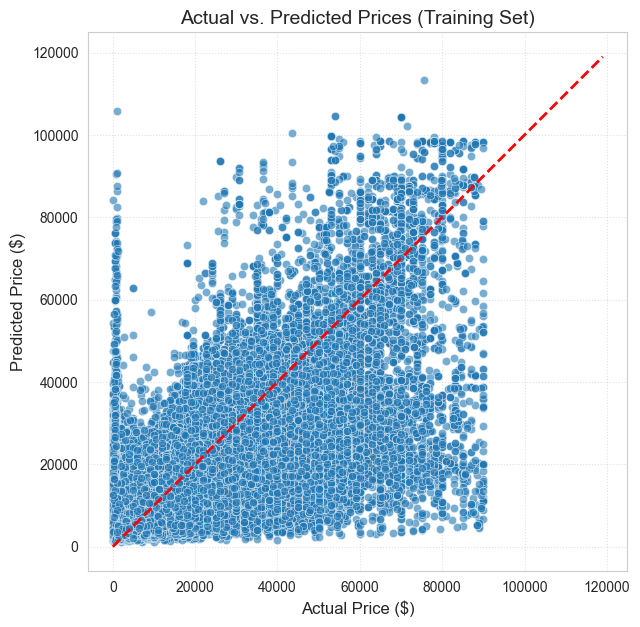

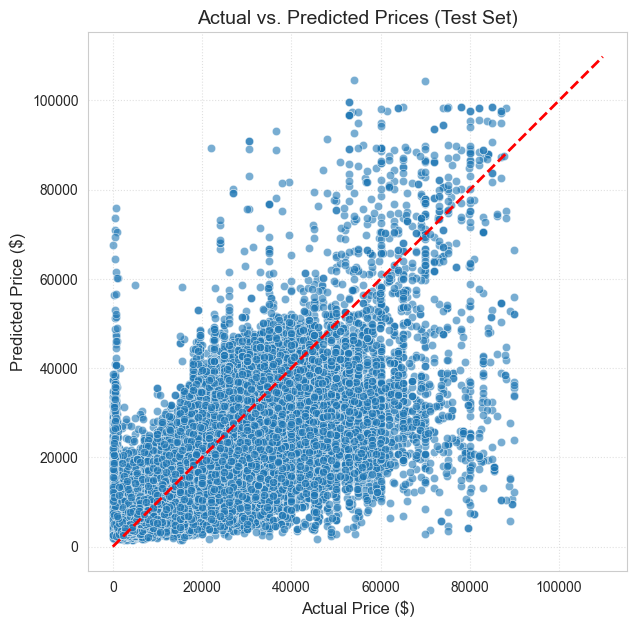

In [188]:
#generate residual plots to evaluate model on actual vs prediction for training and test set
def plot_actual_vs_predicted(y_true, y_pred, title):
    """Generates an Actual vs. Predicted scatter plot."""
    plt.figure(figsize=(7, 7))

    # Scatter plot of True Price vs. Predicted Price
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)

    # Add the Ideal Line (where True = Predicted)
    max_val = max(y_true.max(), y_pred.max())
    plot_range = np.linspace(0, max_val * 1.05, 100)
    plt.plot(plot_range, plot_range, color='r', linestyle='--', linewidth=2)

    # Labels and Title
    plt.title(f'Actual vs. Predicted Prices ({title})', fontsize=14)
    plt.xlabel('Actual Price ($)', fontsize=12)
    plt.ylabel('Predicted Price ($)', fontsize=12)
    plt.gca().set_aspect('equal', adjustable='box') 
    plt.ticklabel_format(style='plain', axis='both')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()
    # 

# Plot the Training Set Performance
plot_actual_vs_predicted(y_train_dollars, y_pred_train_dollars, "Training Set")

# Plot the Test Set Performance
plot_actual_vs_predicted(y_test_dollars, y_pred_test_dollars, "Test Set")

In [27]:
#Calculate VIF for polynomial reg model (Model seems be underfiting, possibly due to multicollinearity.)

preprocessor = model_pipeline_poly.named_steps['preprocessor']
X_processed = preprocessor.transform(X_train)

feature_names = preprocessor.get_feature_names_out()

vif_data = pd.DataFrame()
vif_data["feature"] = feature_names
vif_data["VIF"] = [
    variance_inflation_factor(X_processed, i)
    for i in range(X_processed.shape[1])
    ]

# Print VIF data, sorted high-to-low
print(vif_data.sort_values(by="VIF", ascending=False).head(15))

NameError: name 'model_pipeline_poly' is not defined

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
# 1. Executive Summary and Conclusion
# The extensive data cleaning and feature engineering phase was highly successful, but all tested Linear Models (Linear, Ridge, Lasso, and Polynomial Regression)
# failed to explain the market dynamics. The best predictive model achieved a low R^2 of only ~30% and an average prediction error of over $7,500.
# Conclusion: The problem is not data quality but High Bias (Underfitting)—the linear form of the model is mathematically too simple to capture the complex,
# non-linear relationships and feature interactions that drive pricing.
# 
# Recommendation: Do not use the current model for pricing. Immediate action is required to switch to a non-linear ensemble method (like Random Forest or XGBoost) to 
# achieve the necessary R^2 stability (expected 80-95%) and deliver reliable, actionable insights.

In [ ]:
# While the overall model failed, diagnostic tools like Permutation Importance revealed the market's true priorities.
# These insights should guide your inventory strategy immediately:
# 1. Mileage x Age (mean importance = 20.22%) is the strongest driver. The market heavily punishes cars with high mileage relative to their age.
#    Inventory must prioritize cars with low usage for their model year (e.g., a 5-year-old car with 20k miles).
# 2. State mean price (5.7%) - The average price in your specific State/Region is the second most important factor. All pricing must be anchored to local market values.
# 3. Mileage x Mileage (~5%) - The market applies a highly non-linear discount to mileage, meaning the value drop is steeper for very high mileage cars than
#    it is for low-to-mid mileage cars.
# 4. State mean price x Age (~5%) - The rate at which a car depreciates depends on the local market. Older cars in a high-value state may retain value longer.


# Please note that these findings exclude extreme outliers in the data (price > $90k, odometer > 300k miles, cars older than 1970)
# Records missing information on fuel, odometer, and transmission were dropped.
# High cardinality features were consolidated (manufacturer mapped to country of origin, type of vehicle was grouped into categories)
# The target variable was transformed (log of price) to stabilize the model's variance, and year was converted to Age.

In [ ]:
# Next steps/recommendation
#To move past this roadblock and deliver the promised product, we must update the modeling tool:Action: Proceed to Phase 2 by using the fully prepared and
# cleaned feature set with a tree-based ensemble method. The new model will be able to interpret the crucial Mileage x Age interaction and
# deliver R^2 scores high enough for reliable pricing and inventory decisions.